In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install numpy matplotlib pandas scikit-learn

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import common

In [4]:
common.hello()

Hello from common


In [5]:
# nba_initial = pd.read_csv('cleaned.csv', index_col=[0])
nba = common.get_cleaned_baseline_data('../data/cleaned_data/base_cleaned.csv')
nba

,playerName,seasonStartYear,salary,inflationAdjSalary,startYear,height,weight,MP,PTS,Age,...,POR,SAC,SAS,SEA,TOR,TOT,UTA,VAN,WAS,WSB
0,Michael Jordan,1996,30140000,52258566,1985.0,78.0,198.0,3090.0,2491.0,32.0,...,0,0,0,0,0,0,0,0,0,0
1,Horace Grant,1996,14857000,25759971,1988.0,82.0,215.0,2286.0,847.0,30.0,...,0,0,0,0,0,0,0,0,0,0
2,Reggie Miller,1996,11250000,19505934,1988.0,79.0,185.0,2621.0,1606.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,Shaquille O'Neal,1996,10714000,18576585,1993.0,85.0,325.0,1946.0,1434.0,23.0,...,0,0,0,0,0,0,0,0,0,0
4,Gary Payton,1996,10212000,17706187,1991.0,76.0,180.0,3162.0,1563.0,27.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,Adreian Payne,2017,77250,85683,2015.0,82.0,237.0,135.0,63.0,25.0,...,0,0,0,0,0,0,0,0,0,0
10465,James Young,2017,77250,85683,2015.0,78.0,215.0,220.0,68.0,21.0,...,0,0,0,0,0,0,0,0,0,0
10471,Darrun Hilliard,2017,77250,85683,2016.0,78.0,205.0,381.0,127.0,23.0,...,0,0,0,0,0,0,0,0,0,0
10481,Jonathan Gibson,2017,74158,82253,2017.0,74.0,185.0,231.0,106.0,29.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# nba = nba_initial.dropna()
# nba_initial

In [7]:
# nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
# nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace(',', '')
# nba['inflationAdjSalary'] = nba['inflationAdjSalary'].astype(int)
# nba['inflationAdjSalary_log'] = nba['inflationAdjSalary'].apply(lambda x: np.log(x))
# nba

In [8]:
#cols: MP(minutes played), PTS(points), Age, team, games(games played), games_started, PER(player efficiency rating),
# FTr(free throw rating), AST(assists), STL(steals), TRB(total rebounds), FT(free throws), 3P(three points), FG(field goals)
# X = nba[['MP', 'PTS', 'Age', 'games', 'games_started', 'PER', 'FTr', 'AST', 'STL', 'TRB', 'FT', '3P', 'FG']]
# y = nba[['inflationAdjSalary_log']]
nba = common.add_log_y_values(nba)

# X, y = common.get_X_y_vals(nba)
X_train, X_test, y_train, y_test = common.split_data(nba)
# type(X)
# common.split_data(nba)

In [9]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
y_train

print(len(X_train[0]))

65


In [10]:
#Linear Rgeression model of the form y = w0 + w1x

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.41886071291927957, R2: 0.7348193303985696


NameError: name 'y' is not defined

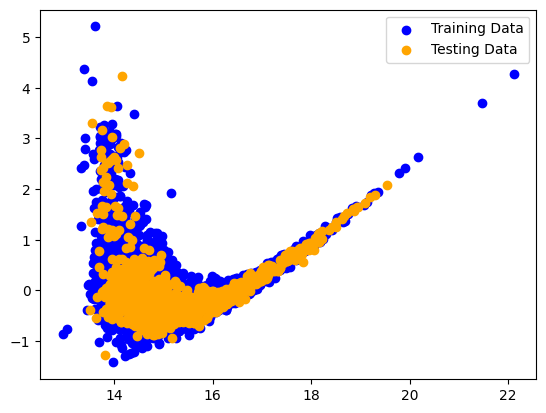

In [12]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.title("Residual Plot for Linear Regression")

In [13]:
#attempted scaling of all feautures vs taking the log of just the prices (target) and the latter gives better performance
from sklearn.preprocessing import MinMaxScaler

# X_train
# scaler = MinMaxScaler()
# numeric_vars = ['MP', 'PTS', 'Age', 'games', 'games_started', 'PER', 'FTr', 'AST', 'STL', 'TRB', 'FT', '3P', 'FG']
# X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
# X_test[numeric_vars] = scaler.fit_transform(X_test[numeric_vars])
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.fit_transform(y_test)
# y_train

In [16]:

from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

#testing with number of features=11
rfe = RFE(lm, n_features_to_select=64)             
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [17]:
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, y_pred)
print(r2)

0.7348193303985708


In [19]:
from sklearn.model_selection import GridSearchCV

hyper_params = [{'n_features_to_select': list(range(1, 65))}]


lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [18]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
be = model_cv.best_score_
best_index = model_cv.best_index_

print("Best result:", be, "at index", best_index)

NameError: name 'model_cv' is not defined

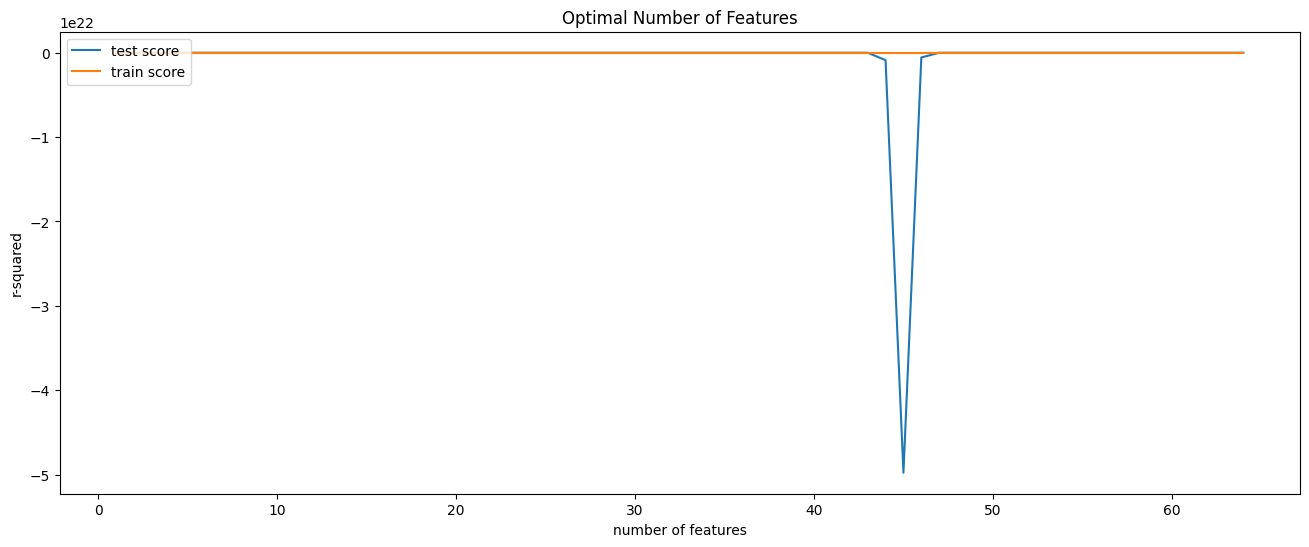

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
n_features_optimal = 64 #from graph above

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('MP', True, 1),
 ('PTS', True, 1),
 ('Age', True, 1),
 ('games', True, 1),
 ('games_started', True, 1),
 ('PER', True, 1),
 ('FTr', True, 1),
 ('AST', True, 1),
 ('STL', True, 1),
 ('TRB', True, 1),
 ('FT', False, 3),
 ('3P', True, 1),
 ('FG', False, 2)]

In [ ]:
# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
rms = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {MSE}, R2: {r2}, RMSE: {rms}, MAE: {mae}")

MSE: 0.7281966952592402, R2: 0.4328932363815571, RMSE: 0.8533444177231373, MAE: 0.6375282882613397


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from scipy.stats import uniform 
from scipy.stats import randint

parameters = {
                'alpha': uniform(0.00001, 0.001),
                'max_iter': randint(500, 1500),
                'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                'eta0': uniform(0.001,0.1)
            }
model = SGDRegressor()
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src.fit(X_train, y_train.values.reshape((-1,)))
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 SGDRegressor(alpha=0.0003934544472893809, eta0=0.07683842027218729,
             learning_rate='adaptive', max_iter=536)

 The best score across ALL searched params:
 -2.2912732554515987e+23

 The best parameters across ALL searched params:
 {'alpha': 0.0003934544472893809, 'eta0': 0.07683842027218729, 'learning_rate': 'adaptive', 'max_iter': 536}


In [ ]:
sgdregressor = SGDRegressor(alpha=randm_src.best_params_['alpha'], max_iter=randm_src.best_params_['max_iter'],
                            learning_rate=randm_src.best_params_['learning_rate'], eta0=randm_src.best_params_['eta0'])
# sgdregressor = SGDRegressor()
# sgdregressor.fit(X_train, y_train.values.reshape((-1,)))  
# y_pred_sgd = sgdregressor.predict(X_test)

rfe = RFE(sgdregressor, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train.values.reshape((-1,)))

y_pred_sgd = rfe.predict(X_test)

In [ ]:
MSE_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
rms_sgd = mean_squared_error(y_test, y_pred_sgd, squared=False)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
print(f"MSE: {MSE_sgd}, R2: {r2_sgd}, RMSE: {rms_sgd}, MAE: {mae_sgd}")

MSE: 1.7783033649695031e+22, R2: -1.3849113469000528e+22, RMSE: 133353041396.49396, MAE: 98248624772.48306


Text(0.5, 1.0, 'Residual Plot for SGDRegressor')

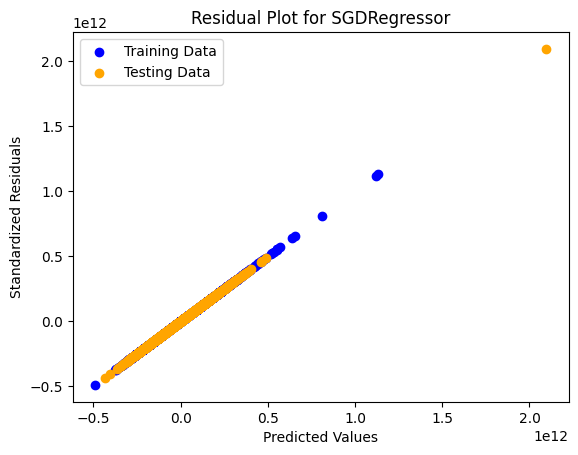

In [ ]:
plt.scatter(rfe.predict(X_train), rfe.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(rfe.predict(X_test), rfe.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for SGDRegressor")

In [ ]:
from sklearn.linear_model import Lasso

parameters = {
                'alpha': uniform(0, 10)
             }
model = Lasso()
randm_src_lasso = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src_lasso.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n", randm_src_lasso.best_params_)

lassoregressor = Lasso(alpha=randm_src_lasso.best_params_['alpha'])
# lassoregressor.fit(X_train, y_train)  
# y_pred_lasso = lassoregressor.predict(X_test)

rfe = RFE(lassoregressor, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train.values)
y_pred_lasso = rfe.predict(X_test)

MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rms_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"MSE: {MSE_lasso}, R2: {r2_lasso}, RMSE: {rms_lasso}, MAE: {mae_lasso}")


 The best parameters across ALL searched params:
 {'alpha': 1.7561159630591927}
MSE: 0.7994550313122295, R2: 0.37739849903526956, RMSE: 0.8941224923422011, MAE: 0.681050567422753


Text(0.5, 1.0, 'Residual Plot for Linear Model with L1 regularization')

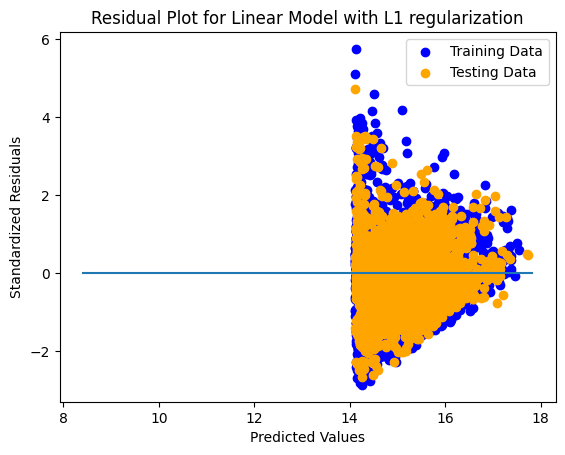

In [ ]:
plt.scatter(rfe.predict(X_train), rfe.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(rfe.predict(X_test), rfe.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for Linear Model with L1 regularization")

In [ ]:
from sklearn.linear_model import Ridge

parameters = {
                'alpha': uniform(0, 10)
             }
model = Ridge()
randm_src_ridge = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
randm_src_ridge.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n", randm_src_ridge.best_params_)

ridgeregressor = Ridge(alpha=randm_src_ridge.best_params_['alpha'])
# ridgeregressor.fit(X_train, y_train)  
# y_pred_ridge = ridgeregressor.predict(X_test)
rfe = RFE(ridgeregressor, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train.values)
y_pred_ridge = rfe.predict(X_test)

MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rms_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"MSE: {MSE_ridge}, R2: {r2_ridge}, RMSE: {rms_ridge}, MAE: {mae_ridge}")


 The best parameters across ALL searched params:
 {'alpha': 9.67310892201406}
MSE: 0.7281754118749545, R2: 0.43290981150646457, RMSE: 0.8533319470610218, MAE: 0.6375294201051904


Text(0.5, 1.0, 'Residual Plot for Linear Model with Ridge regularization')

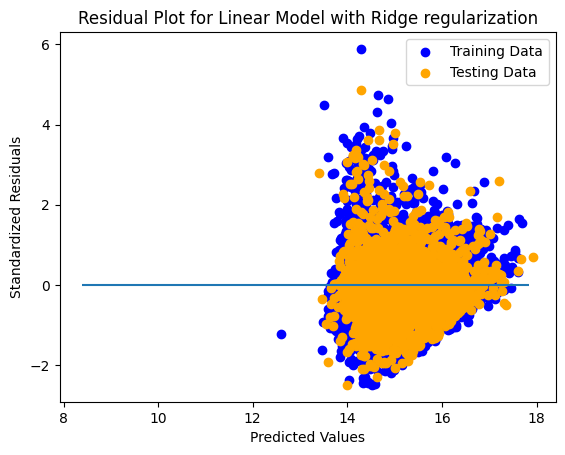

In [ ]:
plt.scatter(rfe.predict(X_train), rfe.predict(X_train) - y_train.values, c="blue", label="Training Data")
plt.scatter(rfe.predict(X_test), rfe.predict(X_test) - y_test.values, c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for Linear Model with Ridge regularization")

In [ ]:
from sklearn.linear_model import LassoCV

lassocvregressor = LassoCV()
lassocvregressor.fit(X_train, y_train)  
y_pred_lassocv = lassocvregressor.predict(X_test)

MSE_lassocv = mean_squared_error(y_test, y_pred_lassocv)
r2_lassocv = r2_score(y_test, y_pred_lassocv)
rms_lassocv = mean_squared_error(y_test, y_pred_lassocv, squared=False)
mae_lassocv = mean_absolute_error(y_test, y_pred_lassocv)

print(f"MSE: {MSE_lassocv}, R2: {r2_lassocv}, RMSE: {rms_lassocv}, MAE: {mae_lassocv}")

MSE: 0.7627878799674186, R2: 0.40595423083910664, RMSE: 0.873377283862718, MAE: 0.6589506930743775


C:\Users\riyaag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Residual Plot for LassoCV model')

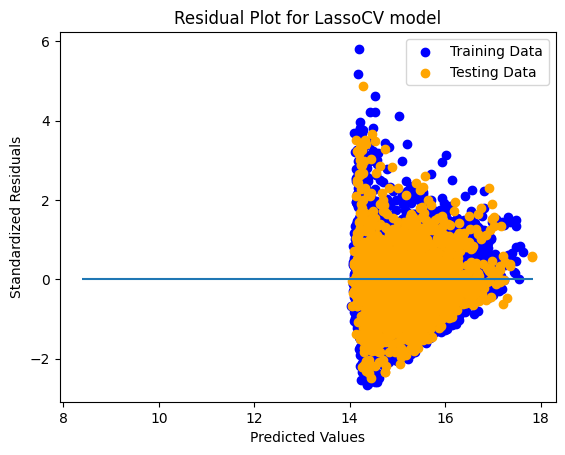

In [ ]:
plt.scatter(lassocvregressor.predict(X_train), lassocvregressor.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(lassocvregressor.predict(X_test), lassocvregressor.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for LassoCV model")